In [ ]:
# Supervised ML
# Regression : Simple Linear Regression
# Project 1 : Goal is to design a model that can predict marks
# if given the number of hours studied.

# import all necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Stage 1 : Data Gathering
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
# Stage 2 : EDA
data.shape

(9, 4)

In [ ]:
data.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


In [ ]:
# Stage 3 : Data Preparation
# a.) check for missing values
# b.) check for duplicate values
# c.) convert non numerical features into numerical
# d.) normalization
# e.) select independent and dependent variable

In [ ]:
# a.) check for missing values
data.isnull().sum()

Hours_Studied    0
Test_Grade       0
Status           0
Result           0
dtype: int64

In [ ]:
# b.) check for duplicate values
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [ ]:
# c.) convert non numerical features into numerical
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [ ]:
data.Status = lb.fit_transform(data.Status)

In [ ]:
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [ ]:
data.Test_Grade.values

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# d.) normalization
# the goal of normalization is to change the the values of numeric columns in dataset
# to a common scale [0-1]
# Xnorm = (X-Xmin) / (Xmax-Xmin)
# X = 57
# Xmin = 57
# Xmax = 100
# Xnorm = (57-57) / (100-57)
# Xnorm = 0 / 43

# arr = data.Test_Grade.values
# print(arr)

# normalized_values = pp.normalize([arr])
# print(normalized_values)

# nrmlz = pp.MinMaxScaler()
# normalized_values = nrmlz.fit_transform([arr])
# print(normalized_values)

In [ ]:
# e.) select independent and dependent variable

X = data.Hours_Studied.values
X = X.reshape(9,1)
X.shape

(9, 1)

In [ ]:
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# Stage 4 : Model Building [Apply A Suitable ML Algo On Dataset]
# Supervised : Regression [Simple Linear Regression]
# y` = mX + c
# where y` is the predicted values
# where m is the slope/coefficient [change in value of Y w.r.t X]
# where X is the Independent Variable
# where c is intercept [ value of Y when X is zero ]

In [ ]:
import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [ ]:
lin_reg.fit(X,Y)

LinearRegression()

In [ ]:
# Stage 5 : Evaluate Our Model
data['predicted_values'] = lin_reg.predict(X)

In [ ]:
data[['Hours_Studied','Test_Grade','predicted_values']]

,Hours_Studied,Test_Grade,predicted_values
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [ ]:
pred_values = lin_reg.predict(X)
pred_values

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y,pred_values)
print('Accuracy Of Model :',accuracy)

Accuracy Of Model : 0.9757431074095347


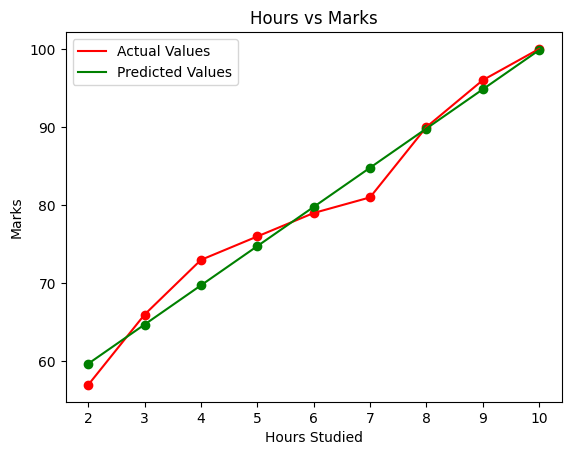

In [ ]:
# plot actual values
plt.plot(X,Y,color='red',label='Actual Values')
plt.scatter(X,Y,color='red')
# plot predicted values
plt.plot(X,pred_values,color='green',label='Predicted Values')
plt.scatter(X,pred_values,color='green')
plt.title('Hours vs Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [ ]:
# Stage 6 : Predictions

hrs = float(input('How Many Hours Studied In A Day : '))
if hrs>=1 and hrs<=10:
  marks = lin_reg.predict([[hrs]])
  print('You Can Score :',int(marks[0]),'marks.')
else:
  print('Please Enter Hours Between 1 to 10')

How Many Hours Studied In A Day : 5.5
You Can Score : 77 marks.
